In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import confusion_matrix, silhouette_samples,silhouette_score


In [155]:
import datetime

In [156]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [157]:
from datetime import date
from dateutil import parser
from datetime import datetime

In [235]:
df=pd.read_excel("D:/Data_Analysis_Projects/AC767000.xlsx")

In [159]:
df.dtypes

Unnamed: 0                                     float64
ردیف                                             int64
بيمه گذار                                       object
فعاليت شغلي اصلي                                object
صدور بيمه نامه به صورت با نام                   object
معرف                                            object
واحد صدور                                       object
تاريخ پيشنهاد                                   object
تاریخ شروع                                      object
تاریخ پایان                                     object
نحوه محاسبه                                     object
مدت                                              int64
تاريخ صدور                                      object
آدرس محل فعاليت                                 object
غرامت فوت و نقص عضو ماه عادي هرنفردرهرحادثه      int64
غرامت فوت ماه حرام هرنفردرهرحادثه                int64
غرامت فوت و نقص عضو درطول مدت بيمه               int64
هزينه پزشكي فرد درهرحادثه                        int64
هزينه پزشك

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   0 non-null      float64
 1   ردیف                                         1054 non-null   int64  
 2   بيمه گذار                                    1054 non-null   object 
 3   فعاليت شغلي اصلي                             1054 non-null   object 
 4   صدور بيمه نامه به صورت با نام                1054 non-null   object 
 5   معرف                                         1054 non-null   object 
 6   واحد صدور                                    1054 non-null   object 
 7   تاريخ پيشنهاد                                193 non-null    object 
 8   تاریخ شروع                                   1054 non-null   object 
 9   تاریخ پایان                                  1054 non-null   object 
 10  

In [236]:
import time 
import datetime 
from datetime import datetime

In [237]:
df.shape

(1054, 32)

In [238]:
df['تاریخ صدور']=pd.to_datetime(df['تاريخ صدور'], format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [239]:
df['تاریخ صدور']

0      2014-09-04
1      2014-09-12
2      2014-09-04
3      2014-09-05
4      2014-09-06
          ...    
1049   2015-09-16
1050   2015-10-13
1051   2015-10-13
1052   2015-10-22
1053   2015-10-20
Name: تاریخ صدور, Length: 1054, dtype: datetime64[ns]

In [240]:
out = df.loc[pd.to_datetime(df['تاريخ صدور'],format='%Y-%m-%d %H:%M:%S',errors='coerce').isna(), 'تاريخ صدور']

In [241]:
out

751    2/30/2015
808    2/31/2015
809    2/29/2015
810    2/29/2015
812    2/30/2015
814    2/29/2015
817    2/31/2015
818    2/30/2015
822    2/29/2015
823    2/29/2015
824    2/29/2015
825    2/29/2015
826    2/30/2015
827    2/30/2015
828    2/30/2015
832    2/30/2015
958    4/31/2015
Name: تاريخ صدور, dtype: object

In [242]:
#remove the given wrong dates (out)

In [243]:
df=df.drop(out.index)

In [244]:
df.shape

(1037, 33)

In [245]:
today=pd.Timestamp('07/19/2022')

In [246]:
df['تاريخ صدور']=df['تاريخ صدور'].agg(pd.Timestamp)

In [247]:
df['Diff_Days']=df['تاريخ صدور'].agg(lambda x:(today-x).days)

In [248]:
df['Diff_Days']

0       2875
1       2867
2       2875
3       2874
4       2873
        ... 
1049    2498
1050    2471
1051    2471
1052    2462
1053    2464
Name: Diff_Days, Length: 1037, dtype: int64

In [249]:
Recency=df.groupby('بيمه گذار').Diff_Days.min()

In [250]:
Recency

بيمه گذار
0 حاجي خداداد كد 107401                             2581
آدينه محمد محمدزاده كد 54408                        2813
آذرميدخت علانظري كد 140989                          2667
آرش طهماسبي نيا كد 55977                            2804
آزمايشگاه اكروديته بنام معيار گستر آريا كد 69208    2782
                                                    ... 
کيوان مختاري جباري كد 59029                         2656
گروه توليدي صنعتي سازان كد 124738                   2710
گروه صنعتي زيست بست پرشيا كد 1922                   2861
گسترش رهان ابنيه سازان كد 61484                     2789
گلنار حسيني دهکردي كد 119975                        2739
Name: Diff_Days, Length: 914, dtype: int64

In [251]:
#استخراج متغیر Frequency

In [ ]:
#برای استخراج این متغیر تعداد دفعات قرارداد در مدت هر قرارداد ضرب شده است

In [252]:
df['contract_qty']=df['شرکت بیمه سال قبل'].agg(lambda x:x+1)

In [253]:
df['contract_qty']=df['contract_qty']*df['مدت']

In [323]:
Frequency=df.groupby('بيمه گذار').contract_qty.sum()

In [324]:
Frequency

بيمه گذار
0 حاجي خداداد كد 107401                             730
آدينه محمد محمدزاده كد 54408                        730
آذرميدخت علانظري كد 140989                          730
آرش طهماسبي نيا كد 55977                            119
آزمايشگاه اكروديته بنام معيار گستر آريا كد 69208    730
                                                   ... 
کيوان مختاري جباري كد 59029                         730
گروه توليدي صنعتي سازان كد 124738                   365
گروه صنعتي زيست بست پرشيا كد 1922                   365
گسترش رهان ابنيه سازان كد 61484                     365
گلنار حسيني دهکردي كد 119975                         62
Name: contract_qty, Length: 914, dtype: int64

In [325]:
#استخراج متغیر Monetary

In [326]:
Monetary=df.groupby('بيمه گذار').sum().loc[:,'حق بيمه کل(با ماليات)']

In [327]:
Monetary

بيمه گذار
0 حاجي خداداد كد 107401                             10770192
آدينه محمد محمدزاده كد 54408                         8808388
آذرميدخت علانظري كد 140989                           3265920
آرش طهماسبي نيا كد 55977                             1060000
آزمايشگاه اكروديته بنام معيار گستر آريا كد 69208     2346628
                                                      ...   
کيوان مختاري جباري كد 59029                          1661581
گروه توليدي صنعتي سازان كد 124738                   46537200
گروه صنعتي زيست بست پرشيا كد 1922                    5093088
گسترش رهان ابنيه سازان كد 61484                     62713310
گلنار حسيني دهکردي كد 119975                         1649052
Name: حق بيمه کل(با ماليات), Length: 914, dtype: int64

In [328]:
X=pd.concat((pd.DataFrame(Recency),pd.DataFrame(Frequency),pd.DataFrame(Monetary)),axis=1)

In [329]:
X

,Diff_Days,contract_qty,حق بيمه کل(با ماليات)
بيمه گذار,,,
0 حاجي خداداد كد 107401,2581,730,10770192
آدينه محمد محمدزاده كد 54408,2813,730,8808388
آذرميدخت علانظري كد 140989,2667,730,3265920
آرش طهماسبي نيا كد 55977,2804,119,1060000
آزمايشگاه اكروديته بنام معيار گستر آريا كد 69208,2782,730,2346628
...,...,...,...
کيوان مختاري جباري كد 59029,2656,730,1661581
گروه توليدي صنعتي سازان كد 124738,2710,365,46537200
گروه صنعتي زيست بست پرشيا كد 1922,2861,365,5093088


In [330]:
X.columns=['R','F','M']

In [331]:
#Elboe Method
#the best cluster no=3

In [332]:
wss=[]
for n in range(1,10):
    kmeans=KMeans(n_clusters=n).fit(X)
    wss.append(kmeans.inertia_)



Text(0, 0.5, 'Within sum of Square Distance')

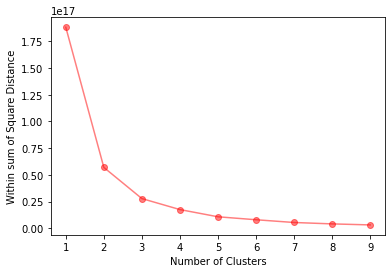

In [333]:
plt.plot(range(1,10),wss,c='r',marker='o',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Within sum of Square Distance')



In [334]:
n_cluster=3
kmeans=KMeans(n_clusters=n_cluster).fit(X)

In [335]:
kmeans.cluster_centers_

array([[2.75914754e+03, 4.52528103e+02, 5.11517822e+06],
       [2.75200000e+03, 7.99100000e+02, 1.04708216e+08],
       [2.75332000e+03, 7.83680000e+02, 4.25433320e+07]])

In [336]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

,R,F,M
0,2759.147541,452.528103,5.115178e+06
1,2752.000000,799.100000,1.047082e+08
2,2753.320000,783.680000,4.254333e+07


In [337]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns).max()

R    2.759148e+03
F    7.991000e+02
M    1.047082e+08
dtype: float64

In [338]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns).min()

R    2.752000e+03
F    4.525281e+02
M    5.115178e+06
dtype: float64

In [339]:
#cluster 1----- طرفدار

In [340]:
#cluster 0----- غیرطرفدار

In [341]:
#cluster 2------ خنثی

In [342]:
labs=kmeans.labels_

In [343]:
L=pd.DataFrame(labs)

In [344]:
Name=pd.DataFrame(df['بيمه گذار'].unique())

In [345]:
Clusters=pd.concat((Name,L),axis=1)

In [346]:
des=[]
for i in L[0]:
        if i == 1.0 :   des.append('طرفدار')
        elif i == 2.0:   des.append('غیر طرفدار')
       
        
        else:           des.append('بیطرف')

In [347]:
Clusters['Description']=des

In [348]:
Clusters.columns=['Name','Cluster','des']

In [349]:
Clusters

,Name,Cluster,des
0,عبدالله خدامي قادهاري كد 241,0,بیطرف
1,جاسم کرمي كد 158,0,بیطرف
2,حيدر اکحوان كد 208,0,بیطرف
3,محمدرضا راعي فرد كد 227,0,بیطرف
4,جواد رمضانيان صادق كد 234,0,بیطرف
...,...,...,...
909,اکبر عسگري كد 147424,0,بیطرف
910,شهرام مرادي كد 147490,2,غیر طرفدار
911,شرکت سه نوبر كد 147513,0,بیطرف
912,محسن داود آبادي كد 30706,2,غیر طرفدار


In [350]:
average_silhouette=silhouette_score(X,labs)

In [351]:
average_silhouette

0.8565081053677432

In [352]:
sample_silhouette_values=silhouette_score(X,labs)

In [353]:
sample_silhouette_values

0.8565081053677432

In [286]:
np.sum(sample_silhouette_values<0)

0

In [287]:
#Scaling the variables

In [288]:
X_S=pd.concat((pd.DataFrame(Recency),pd.DataFrame(Frequency),pd.DataFrame(Monetary)),axis=1)

In [289]:
standardize=StandardScaler()

In [290]:
X_S=standardize.fit_transform(X_S)

In [291]:
X_S=pd.DataFrame(X_S)

In [292]:
X_S.columns=['R','F','M']

In [293]:
n_cluster=3
kmeans=KMeans(n_clusters=n_cluster).fit(X_S)

In [294]:
pd.DataFrame(kmeans.cluster_centers_,columns=X_S.columns)

,R,F,M
0,-1.037208,-0.060266,-0.164602
1,0.688674,-0.102489,-0.200694
2,-0.200938,1.620918,3.519453


In [295]:
#بررسی منطق و مفهوم بودن Clustering

In [296]:
#بدست آوردن بردار centroid 
 #مشتری طرفدار M and F -- max, R--min 
 #مشتری غیرطرفدار:  M and F-- min, R-- max
#مشتری خنثی: in the middle of above clusters

In [297]:
#برای اینکه مفهوم و منطق کلاسترها راحتتر بررسی شود سنتروید ها را  بر اساس مقادیر غیراستاندارد حساب میکنیم

In [298]:
Xorg=standardize.inverse_transform(X_S)
Xorg=pd.DataFrame(Xorg)
Xorg.columns=['R','F','M']
Xorg['clusters']=kmeans.labels_

#centroids:
Xorg.groupby('clusters').agg('mean')

,R,F,M
clusters,,,
0,2672.736070,455.363636,5.891305e+06
1,2815.861480,442.001898,5.373607e+06
2,2742.086957,987.391304,5.873445e+07


In [299]:
Xorg.groupby('clusters').agg('mean').max()

R    2.815861e+03
F    9.873913e+02
M    5.873445e+07
dtype: float64

In [300]:
Xorg.groupby('clusters').agg('mean').min()

R    2.672736e+03
F    4.420019e+02
M    5.373607e+06
dtype: float64

In [215]:
#Cluster 2-----طرفدار

In [216]:
#cluster 1-----غیرطرفدار

In [217]:
#cluster 0----خنثی

In [301]:
labs=kmeans.labels_

In [302]:
average_silhouette=silhouette_score(X_S,labs)

In [303]:
average_silhouette

0.38158802390385704

In [304]:
sample_silhouette_values=silhouette_score(X_S,labs)

In [305]:
sample_silhouette_values

0.38158802390385704

In [306]:
np.sum(sample_silhouette_values<0)

0

In [224]:
#شاخص کیفیت کلاسترها نسبت به قبل از نرملایز کردن بسیار کاهش یافت بنابراین مدل اول انتخاب میشود